## **Business Understanding**


#### **Problem Statement**
Understanding and reducing customer churn in the Telecommunications industry

#### **Objectives**
1. **Identify Key Drivers of Churn** : Analyze customer demographics, service usage patterns, contract details, and billing data to pinpoint the factors most strongly associated with churn.
2. **Evaluate Service Utilization** : Determine how the usage of specific services, such as online security, internet service types, and phone service features, influences churn rates.
3. **Segment High-Risk Customers** : Segment the customer base to identify profiles that are at higher risk of churning, enabling targeted retention efforts.
4. **Predictive Modeling** : Develop predictive models to forecast churn, allowing the company to proactively engage with at-risk customers before they decide to leave.
5. **Strategize Retention Efforts** : Provide data-driven recommendations for retention strategies

#### **Key metrics and success criteria** 
1.	**Threshold for Precision and Recall**: The model should achieve a precision and recall of at least 80%. This ensures that the model is reliable in predicting churn and identifying most of the actual churn cases.
2. **Minimum F1 Score**: The F1 score should be at least 0.75. This balances the trade-off between precision and recall, indicating the model performs well even if the class distribution is imbalanced.
3. **AUC-ROC Score** : The AUC-ROC should be at least 0.85. A high AUC-ROC score indicates that the model is effective in distinguishing between churn and non-churn customers.
4. **Confusion Matrix Analysis** : The number of false negatives (FN) should be minimized to ensure that most of the actual churn cases are correctly identified. This is crucial for taking proactive retention measures.
5. **Lift and Gain** : The lift value at the top decile (top 10% of predicted probabilities) should be significantly higher than 1, indicating that the model effectively identifies high-risk churn customers.

**Null Hypothesis (H0)**:
There is no significant difference in the total charges between customers who churn and those who do not churn.

**Alternative Hypothesis (H1)**:
There is a significant difference in the total charges between customers who churn and those who do not churn.


#### **Analytical Questions**
1. How do different customer demographics (age, gender, senior citizen status, partner and dependent status) influence the likelihood of churn?
2. What is the impact of service tenure on customer churn?
3. How do bundled services (e.g., phone, internet, streaming) affect customer retention?
4. How effective are our value-added services (online security, online backup, device protection, tech support) in reducing churn?
5. What is the effect of different payment methods (electronic check, mailed check, bank transfer, credit card) on churn?


## **Data Understanding**

In [389]:
# Importing data manipulation packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import dotenv_values
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingGridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder,RobustScaler, StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix, ConfusionMatrixDisplay

In [390]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values(r"C:\Users\hp\Desktop\lp2\Churn-Analysis\.env")

#get values for the credentials from the .env file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#create connection string
connection_string = f"DRIVER={{SQL Server}}; DATABASE={database}; SERVER={server}; UID={username}; PWD={password}"
 


In [391]:
connection = pyodbc.connect(connection_string)

In [392]:
#select table from database
db_query = ''' SELECT *
                 FROM INFORMATION_SCHEMA.TABLES
                 WHERE TABLE_TYPE = 'BASE TABLE' '''

In [393]:
#call selected table from database
ata = pd.read_sql(db_query, connection)
ata

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\2423470479.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ata = pd.read_sql(db_query, connection)


,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP2_Telco_churn_first_3000,BASE TABLE


In [394]:
#call table to its dataframe
query_01 = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
data_1 = pd.read_sql(query_01, connection)
data_1.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\2291635585.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_1 = pd.read_sql(query_01, connection)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [395]:
print(data_1.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [396]:
#converting to csv
data_1.to_csv('data_1.csv', index = False)

In [397]:
#loading the second dataset from github
data_2 = pd.read_csv(r"C:\Users\hp\Downloads\LP2_Telco-churn-second-2000.csv")

In [398]:
print(data_2.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [399]:
#merging the two datasets
merged_training_dataset = pd.concat([data_1, data_2], axis = 0).reset_index(drop = True)
merged_training_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [400]:
merged_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [401]:
merged_training_dataset.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### **Cleaning the dataset**

In [402]:
#replacing with nan for consistency
merged_training_dataset = merged_training_dataset.fillna(np.nan)

In [403]:
#uniformity!
merged_training_dataset = merged_training_dataset.replace(False, 'No')
merged_training_dataset = merged_training_dataset.replace(True, 'Yes')


In [404]:
#the senior citizen column
merged_training_dataset['SeniorCitizen'] = merged_training_dataset['SeniorCitizen'].replace(0, 'No')
merged_training_dataset['SeniorCitizen'] = merged_training_dataset['SeniorCitizen'].replace(1, 'Yes')


In [405]:
#checking the null values
merged_training_dataset.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [406]:
#previewing the dataset
merged_training_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [407]:
#multiplelines
merged_training_dataset['MultipleLines'].replace('No phone service', 'No', inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\1749816897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_training_dataset['MultipleLines'].replace('No phone service', 'No', inplace = True)


In [408]:
#online security
merged_training_dataset['OnlineSecurity'].replace('No internet service', 'No', inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\63042360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_training_dataset['OnlineSecurity'].replace('No internet service', 'No', inplace = True)


In [409]:
merged_training_dataset['OnlineBackup'].replace('No internet service', 'No', inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\4240807184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_training_dataset['OnlineBackup'].replace('No internet service', 'No', inplace = True)


In [410]:
merged_training_dataset['OnlineBackup'].replace('No internet service', 'No', inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\4240807184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_training_dataset['OnlineBackup'].replace('No internet service', 'No', inplace = True)


In [411]:
merged_training_dataset['TechSupport'].replace('No internet service', 'No', inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\1664446693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_training_dataset['TechSupport'].replace('No internet service', 'No', inplace = True)


In [412]:
merged_training_dataset['StreamingTV'].replace('No internet service', 'No', inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\984890485.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_training_dataset['StreamingTV'].replace('No internet service', 'No', inplace = True)


In [413]:
merged_training_dataset['StreamingMovies'].replace('No internet service', 'No', inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\1086395043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_training_dataset['StreamingMovies'].replace('No internet service', 'No', inplace = True)


In [414]:
merged_training_dataset['DeviceProtection'].replace('No internet service', 'No', inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\2491716772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_training_dataset['DeviceProtection'].replace('No internet service', 'No', inplace = True)


#### **Univariate analysis**

#### Categorical Data

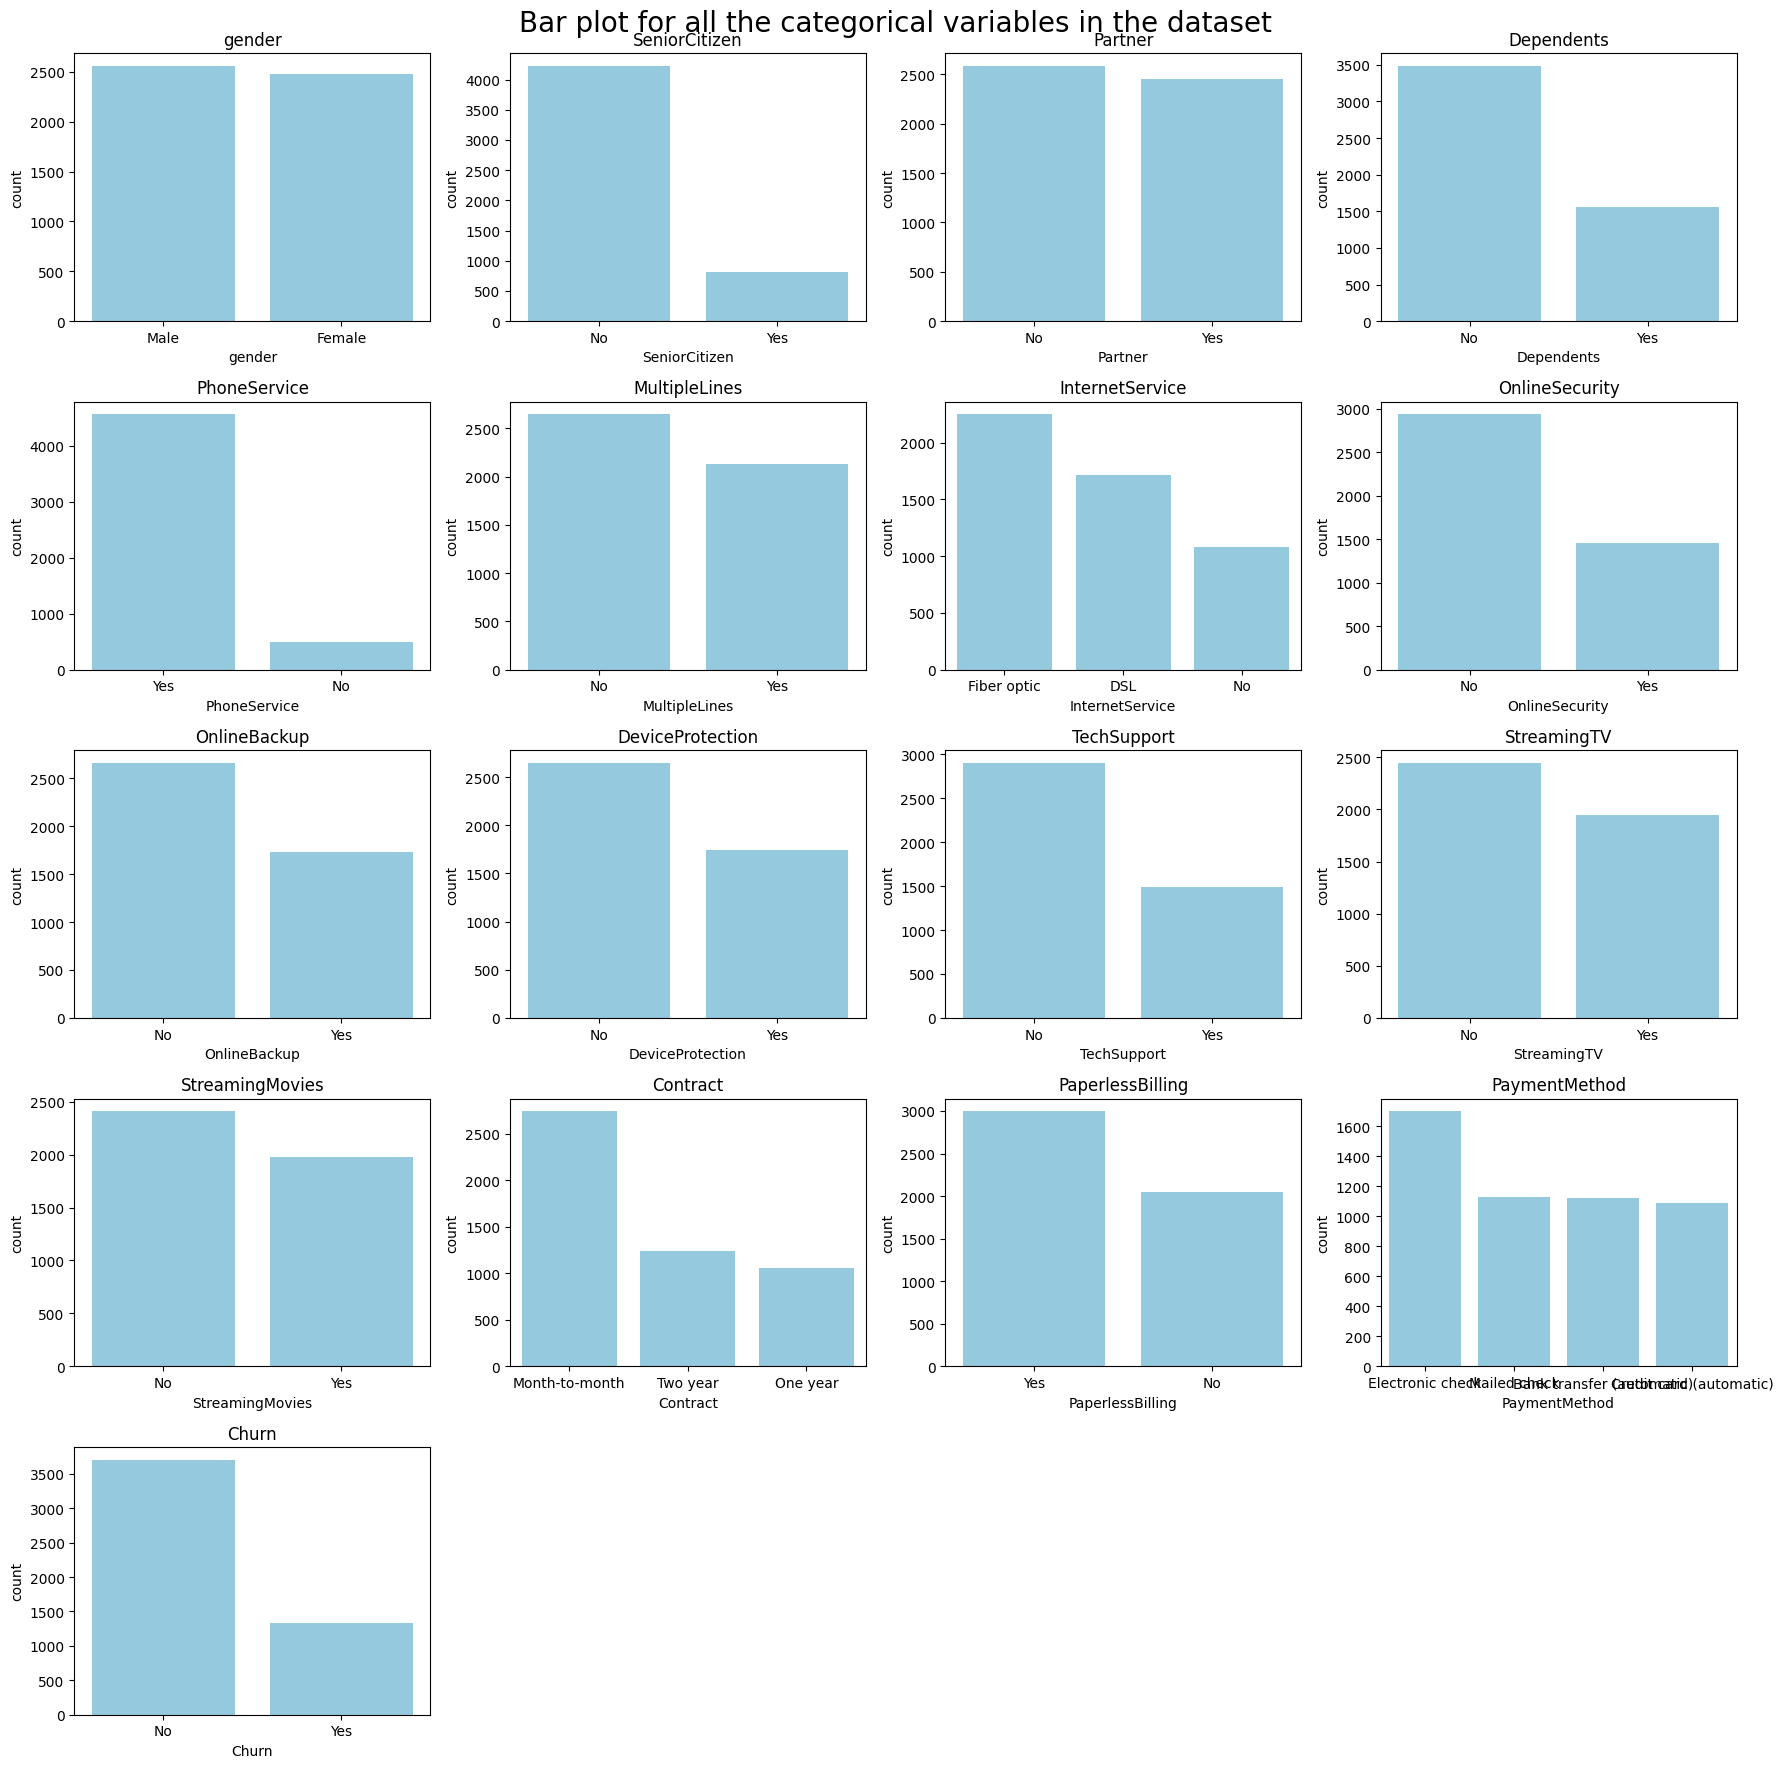

In [415]:

# Create a figure and axes with specified size
fig, axes = plt.subplots(5, 4, figsize=(18, 18))

# Set the title for the entire figure
fig.suptitle('Bar plot for all the categorical variables in the dataset', fontsize=20)

# List of categorical columns to plot
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Iterate over the axes and categorical columns, plot each column
for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(x=column, data=merged_training_dataset, color='skyblue', order=merged_training_dataset[column].value_counts().index, ax=ax)
    ax.set_title(column)  # Set the title for each subplot
    
# Hide the empty subplots if there are any
for i in range(len(categorical_columns), len(axes.flatten())):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


#### Numerical variables

In [416]:
merged_training_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [417]:
merged_training_dataset['TotalCharges'].unique()

array([29.850000381469727, 1889.5, 108.1500015258789, ..., '346.45',
       '306.6', '6844.5'], dtype=object)

In [418]:
# Convert to numeric, handling strings and possible errors
merged_training_dataset['TotalCharges'] = pd.to_numeric(merged_training_dataset['TotalCharges'], errors='coerce')

# Handle precision issues by rounding to 2 decimal places
merged_training_dataset['TotalCharges'] = merged_training_dataset['TotalCharges'].round(2)


In [419]:
merged_training_dataset['TotalCharges'].dtype

dtype('float64')

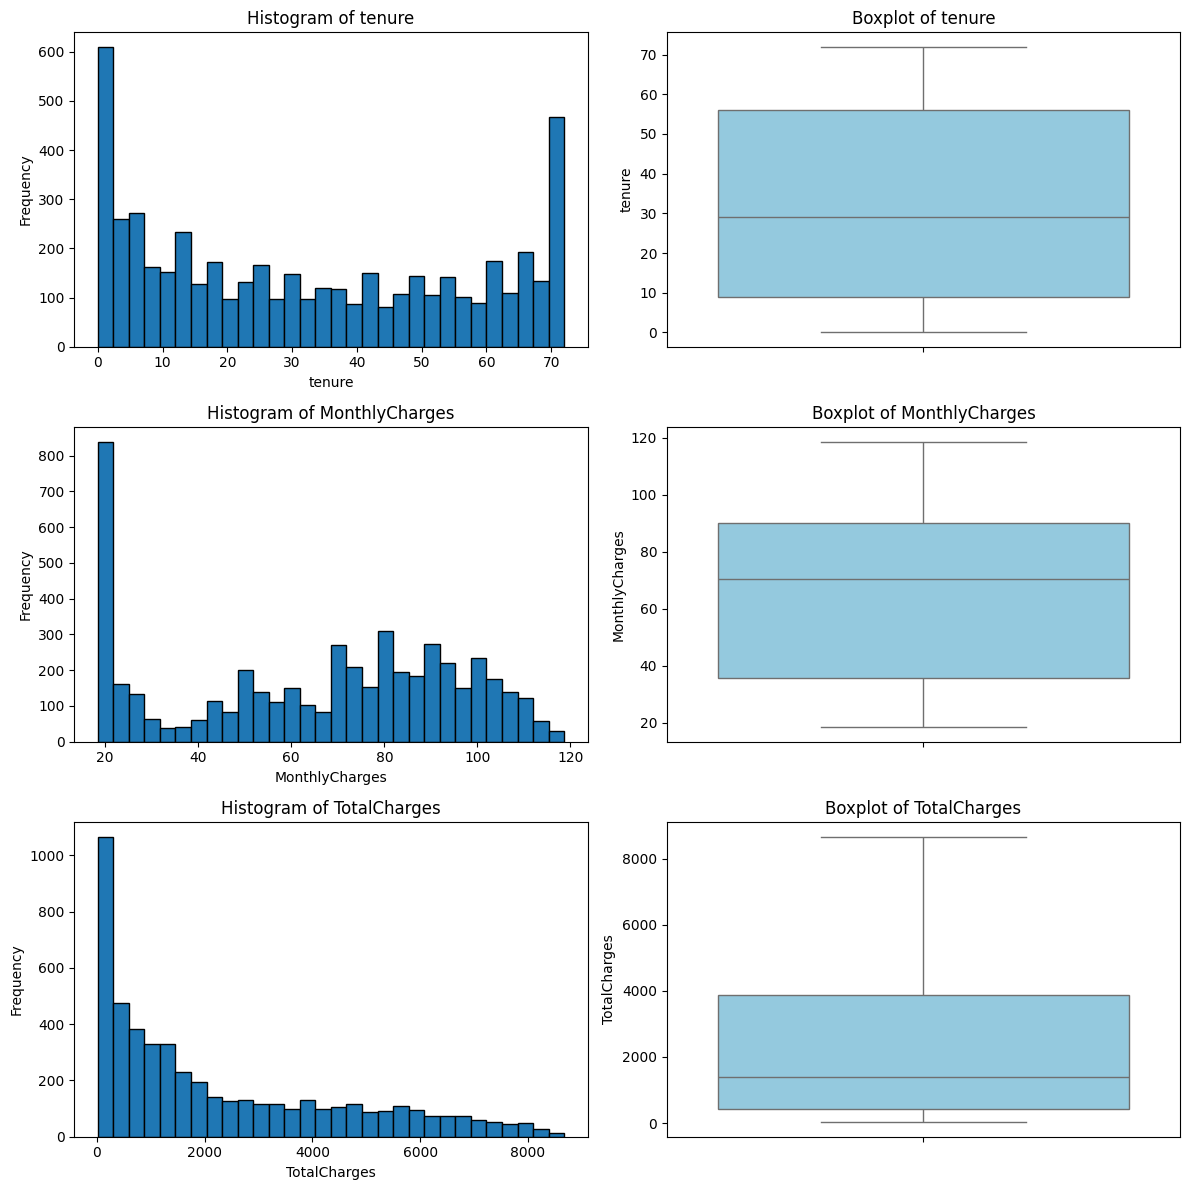

In [420]:
# Columns to plot
columns_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a figure with two subplots (histogram and boxplot)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Plot histograms
for i, col in enumerate(columns_to_plot):
    merged_training_dataset[col].hist(bins=30, ax=axes[i, 0], edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].grid(False)

# Plot boxplots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=merged_training_dataset[col], ax=axes[i, 1], color='skyblue')
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_ylabel(col)
    axes[i, 1].grid(False)

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: ylabel='Density'>

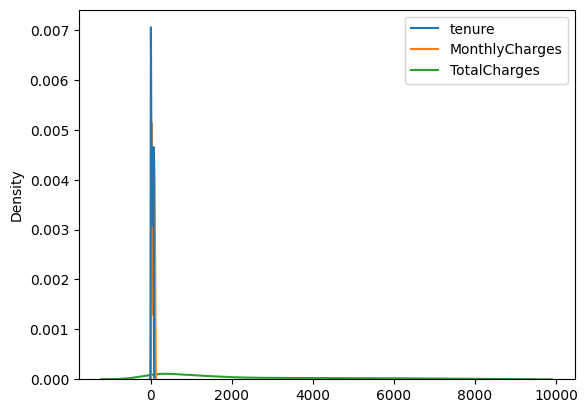

In [421]:
sns.kdeplot(merged_training_dataset[['tenure', 'MonthlyCharges', 'TotalCharges']])


#### Bivariate analysis

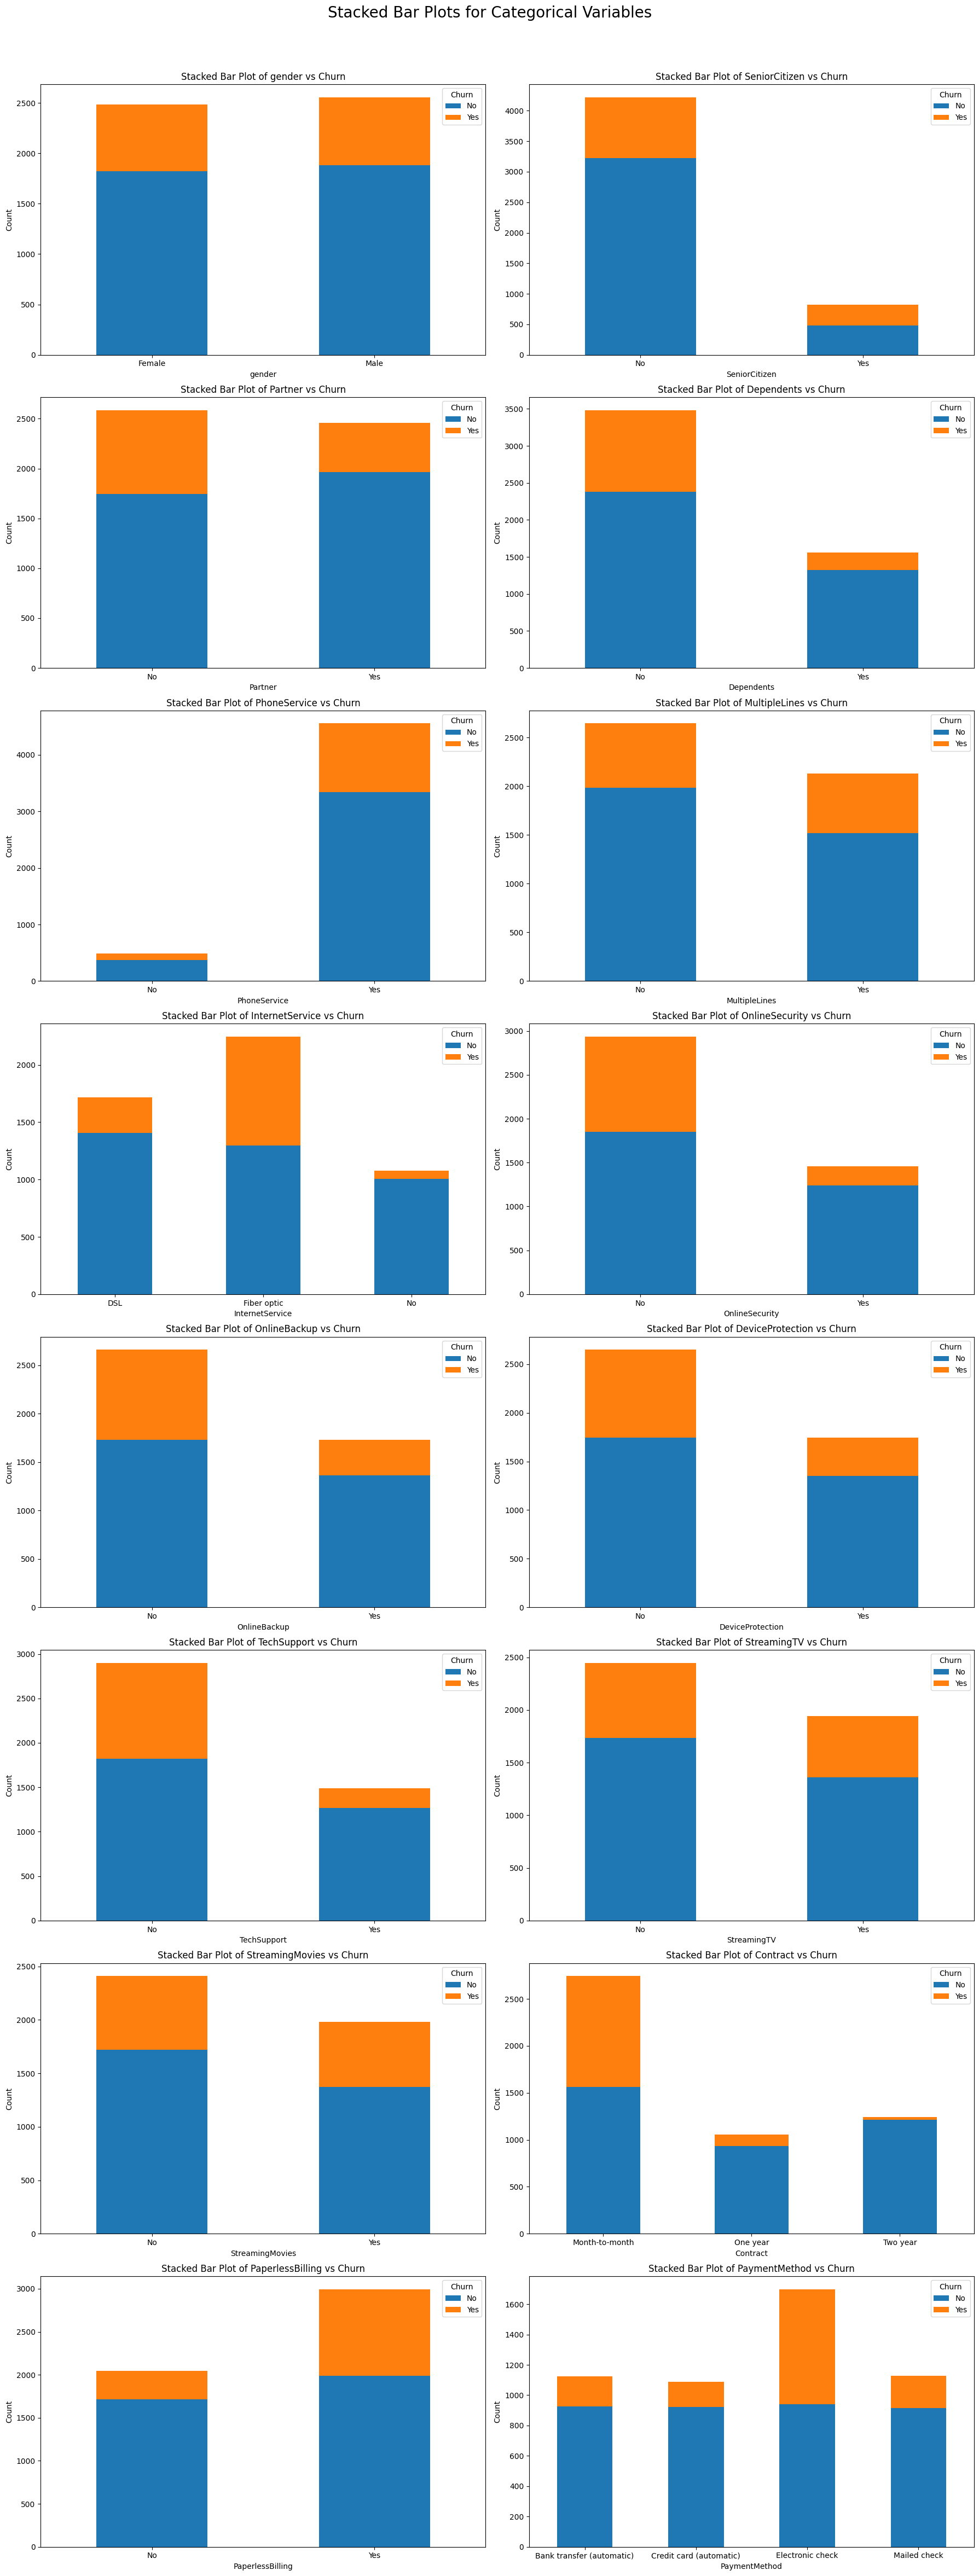

In [422]:
# Get list of categorical columns
categorical_columns = categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
# Define the number of rows and columns for subplots
num_plots = len(categorical_columns)
num_cols = 2  # Number of columns per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Round up division

# Create figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))
fig.suptitle('Stacked Bar Plots for Categorical Variables', fontsize=20)

# Flatten axes if necessary
axes = axes.flatten()

# Loop over categorical columns
for i, column in enumerate(categorical_columns):
    # Create contingency table for the current categorical column and Churn
    contingency_table = pd.crosstab(merged_training_dataset[column], merged_training_dataset['Churn'])
    
    # Plot stacked bar plot
    contingency_table.plot(kind='bar', stacked=True, ax=axes[i], rot=0)
    axes[i].set_title(f'Stacked Bar Plot of {column} vs Churn')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Add space for the title
plt.show()


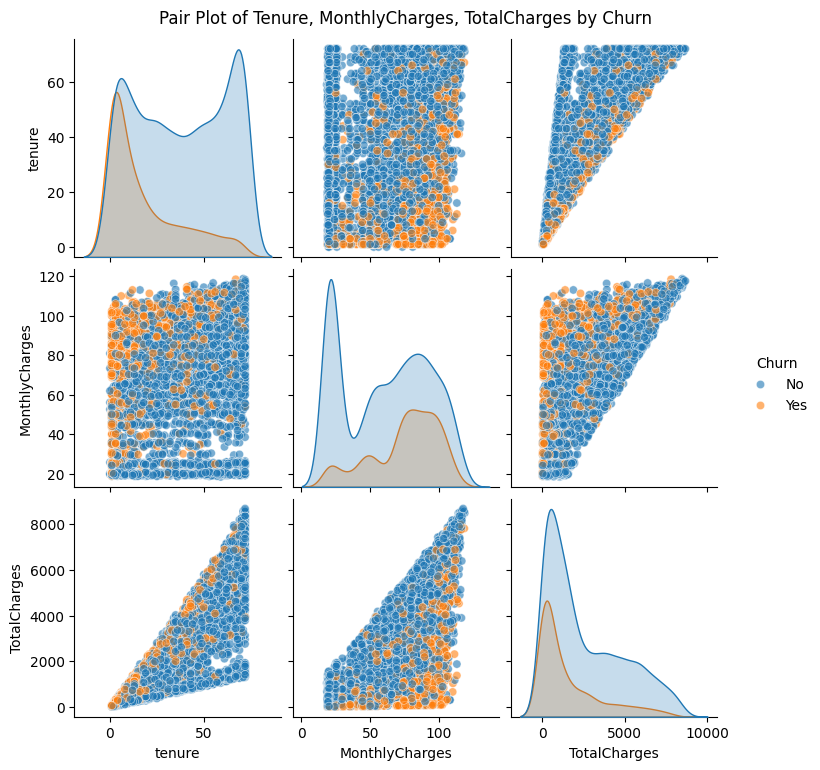

In [423]:
# Selecting the columns of interest along with the Churn column
data_subset = merged_training_dataset[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

# Creating the pair plot
pair_plot = sns.pairplot(data_subset, hue='Churn', diag_kind='kde', plot_kws={'alpha':0.6})
pair_plot.fig.suptitle("Pair Plot of Tenure, MonthlyCharges, TotalCharges by Churn", y=1.02)

plt.show()


<Axes: >

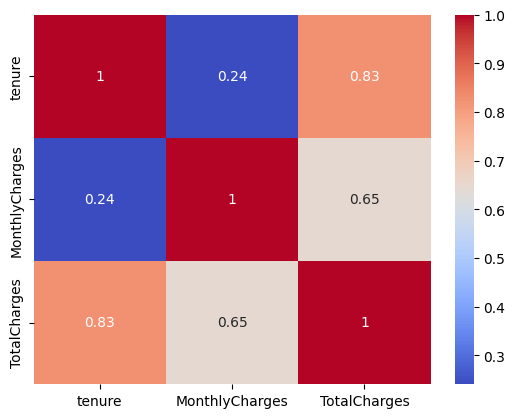

In [424]:
correlation = merged_training_dataset.corr(numeric_only = True)
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

#### **Answering Analytical Questions**

1. How do different customer demographics (age, gender, senior citizen status, partner and dependent status) influence the likelihood of churn?

#### **churn by age**

In [425]:
gender_by_churn = merged_training_dataset.groupby('gender')['Churn'].agg(
    churned = lambda x : (x == 'Yes').sum(),
    not_churned = lambda x : (x == 'No').sum(),
    churn_ratio = lambda x : ((x == 'Yes').sum()/x.size)* 100
).reset_index()


gender_by_churn

,gender,churned,not_churned,churn_ratio
0,Female,661,1823,26.610306
1,Male,675,1883,26.377491


Text(0, 0.5, 'Count')

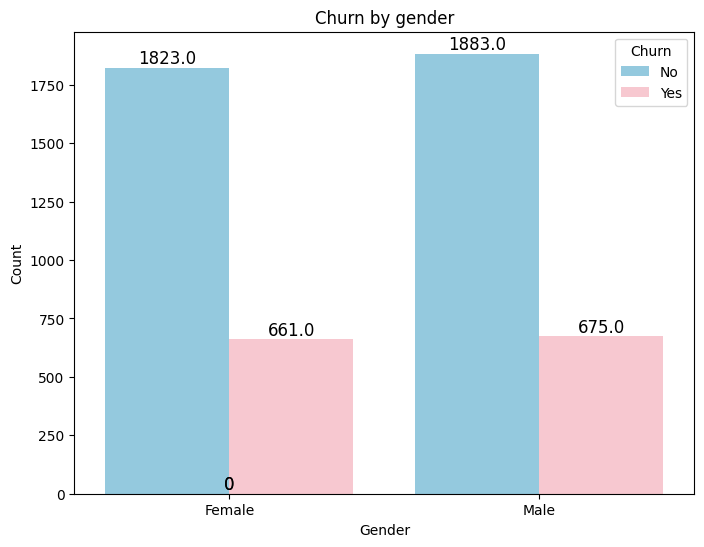

In [426]:
plt.figure(figsize = (8,6))
ax = sns.countplot( data=merged_training_dataset, x='gender', hue = 'Churn', palette={'Yes': 'pink', 'No': 'skyblue'} )
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=12)
plt.title('Churn by gender')
plt.xlabel('Gender')
plt.ylabel('Count')


**Conclusion**
- Both genders have a similar churn ratio, with females slightly higher at 26.61% compared to males at 26.38%.
- Gender may not be a strong predictor of churn behavior in this context, as both groups exhibit similar tendencies.


#### **Churn By SeniorCitizen Status**

In [427]:
churn_by_sc = merged_training_dataset.groupby('SeniorCitizen')['Churn'].agg(
    churned = lambda x : (x == 'Yes').sum(),
    not_churned = lambda x : (x == 'No').sum(),
    churn_ratio = lambda x : ((x == 'Yes').sum()/x.size)* 100
)
churn_by_sc

,churned,not_churned,churn_ratio
SeniorCitizen,,,
No,996,3227,23.579545
Yes,340,479,41.514042


Text(0, 0.5, 'Count')

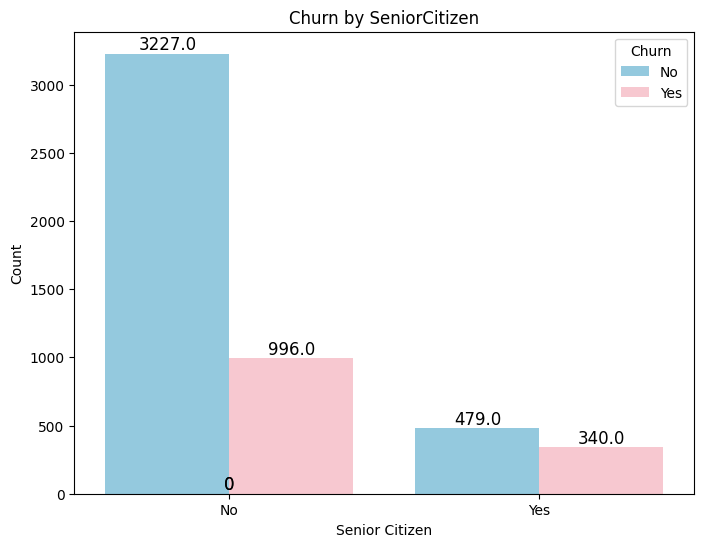

In [428]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = merged_training_dataset, x = 'SeniorCitizen', hue = 'Churn', palette = {'Yes' : 'Pink', 'No' : 'skyblue'})
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=12)
plt.title('Churn by SeniorCitizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')


**Conclusion**
- Senior citizens have a significantly higher churn rate (41.51%) compared to non-senior citizens who have a lower churn rate (23.58%).
- This difference suggests that being a senior citizen is associated with a higher likelihood of churn in this dataset indicating that Senior citizen status is a significant predictor of churn behavior
- The business may need to implement specific retention strategies tailored to address the factors driving higher churn rates among Senior citizens

#### **Churn By Partner Status**

In [429]:
partner_by_churn = merged_training_dataset.groupby('Partner')['Churn'].agg(
    churned = lambda x : (x == 'Yes').sum(),
    not_churned = lambda x : (x == 'No').sum(),
    churn_ratio = lambda x : ((x == 'Yes').sum()/x.size)* 100
).reset_index()
partner_by_churn


,Partner,churned,not_churned,churn_ratio
0,No,842,1743,32.572534
1,Yes,494,1963,20.097640


Text(0, 0.5, 'Count')

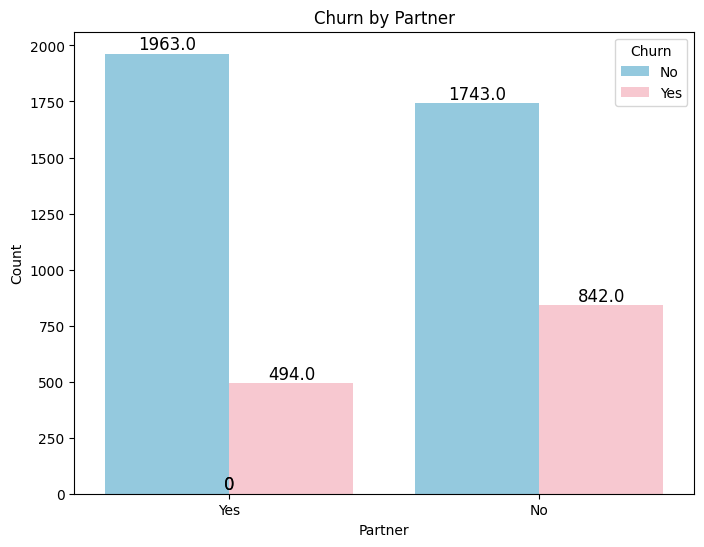

In [430]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = merged_training_dataset, x = 'Partner', hue = 'Churn', palette = {'Yes' : 'Pink', 'No' : 'skyblue'})
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=12)
plt.title('Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')

**Conclusion**
- Customers with a partner (Partner: Yes) have a lower churn rate (20.10%) compared to customers without a partner (Partner: No) who have a higher churn rate (32.57%).This difference suggests that having a partner is associated with a lower likelihood of churn in this dataset.
- Partner status appears to be a significant predictor of churn behavior in this context.Businesses may consider strategies that strengthen relationships with customers who do not have a partner to reduce their higher churn rates.

#### **Churn by whether or not one has dependents**

In [431]:
dependents_by_churn = merged_training_dataset.groupby('Dependents')['Churn'].agg(
    churned = lambda x : (x == 'Yes').sum(),
    not_churned = lambda x : (x == 'No').sum(),
    churn_ratio = lambda x : ((x == 'Yes').sum()/x.size)* 100
).reset_index()
dependents_by_churn


,Dependents,churned,not_churned,churn_ratio
0,No,1099,2382,31.562321
1,Yes,237,1324,15.182575


Text(0, 0.5, 'Count')

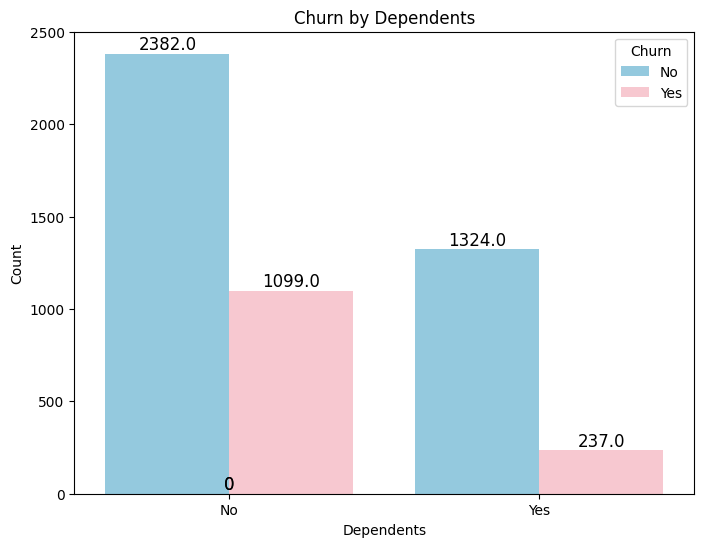

In [432]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = merged_training_dataset, x = 'Dependents', hue = 'Churn', palette = {'Yes' : 'Pink', 'No' : 'skyblue'})
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=12)
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')

#### **Overall Insights on demographic**

-Demographic factors such as senior citizen status, partner status, and having dependents play significant roles in customer churn behavior.
-Senior citizens tend to have higher churn rates, while having a partner or dependents correlates with lower churn rates.
-Gender differences in churn rates are less pronounced compared to other demographic factors analyzed.
-The business can leverage these insights to tailor retention strategies, focusing particularly on customer segments identified with higher churn rates (e.g., senior citizens without partners or dependents).

**Conclusion**
- Customers with dependents (Dependents: Yes) have a significantly lower churn rate (15.18%) compared to customers without dependents (Dependents: No), who have a higher churn rate (31.56%).
- Dependents status appears to be a significant factor influencing churn behavior.Customers who have dependents are less likely to churn compared to those who do not have dependents.The business should target retention strategies towards customers without dependents to mitigate their higher churn rates.

#### 2. **What is the impact of service tenure on customer churn?**

In [433]:
tenure_by_churn = merged_training_dataset.groupby('tenure')['Churn'].agg(
    churned = lambda x : (x == 'Yes').sum(),
    not_churned = lambda x : (x == 'No').sum(),
    churn_ratio = lambda x : ((x == 'Yes').sum()/x.size)* 100
).reset_index()
tenure_by_churn

,tenure,churned,not_churned,churn_ratio
0,0,0,8,0.000000
1,1,270,164,62.211982
2,2,88,79,52.694611
3,3,64,80,44.444444
4,4,51,64,44.347826
...,...,...,...,...
68,68,7,58,10.769231
69,69,6,63,8.695652
70,70,10,76,11.627907
71,71,4,120,3.225806


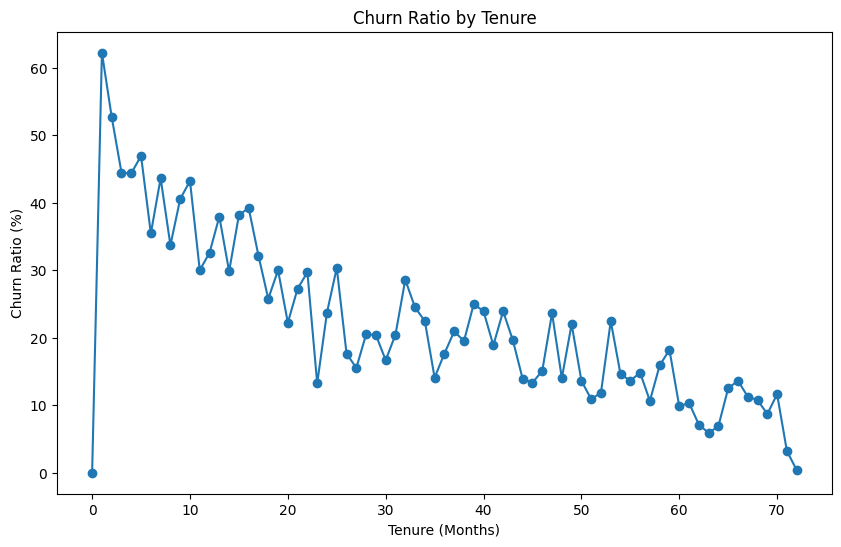

In [434]:
# Plotting churn ratio by tenure
plt.figure(figsize=(10, 6))
plt.plot(tenure_by_churn['tenure'], tenure_by_churn['churn_ratio'], marker='o')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Ratio (%)')
plt.title('Churn Ratio by Tenure')
plt.grid(False)
plt.show()


**Conclusion**

- There is a notable trend of higher churn rates during early tenure. This suggests that customers are more likely to churn shortly after beginning their relationship with the business, potentially due to initial challenges in onboarding, establishing value, or meeting expectations.
- A downward-sloping graph as seen above indicates a decreasing trend in churn rates as the customer relationship duration (tenure) increases. This means that as customers remain with the business for longer periods, they are less likely to churn over time.
- The business should therefore take proactive steps to improve the early customer experience and reduce churn during the early tenure.

In [435]:
merged_training_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 3. **How do bundled services (e.g., phone, internet, streaming) affect customer retention?**

In [436]:
#create a column for bundled services
services = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']
#a function to count in rows
def count_services(row):
    count = 0
    for service in services:
        if service == 'InternetService':
            if row[service] in ['Fiber optic', 'DSL']:
                count += 1
        elif row[service] == 'Yes':
            count += 1
    return count
#temporary column of the counts
merged_training_dataset['ServiceCount'] = merged_training_dataset.apply(count_services, axis =1)
#create the bundled services column
merged_training_dataset['BundledServices'] = merged_training_dataset['ServiceCount'].apply(lambda x : 'Yes' if x >= 2 else 'No')
#drop service count column
merged_training_dataset = merged_training_dataset.drop(columns = ['ServiceCount'])
#preview
print(merged_training_dataset[['customerID', 'BundledServices']]. head())





   customerID BundledServices
0  7590-VHVEG              No
1  5575-GNVDE             Yes
2  3668-QPYBK             Yes
3  7795-CFOCW              No
4  9237-HQITU             Yes


In [437]:
churn_by_bundledservices = merged_training_dataset.groupby('BundledServices')['Churn'].agg(
    churned = lambda x : (x == 'Yes').sum(),
    not_churned = lambda x : (x == 'No').sum(),
    churn_ratio = lambda x : ((x == 'Yes').sum()/x.size)* 100

).reset_index()
churn_by_bundledservices

,BundledServices,churned,not_churned,churn_ratio
0,No,121,926,11.556829
1,Yes,1215,2780,30.405405


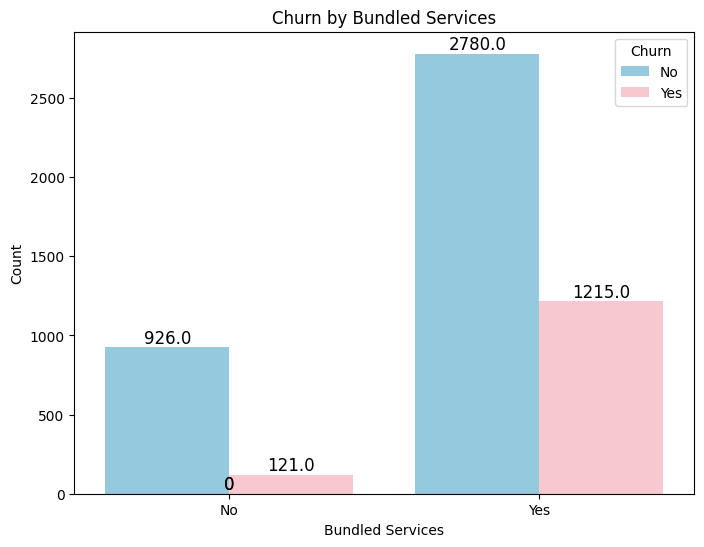

In [438]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = merged_training_dataset, x = 'BundledServices', hue = 'Churn', palette={'Yes' : 'Pink', 'No':'skyblue'})
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2, height),ha='center',va='bottom', fontsize=12)

plt.title('Churn by Bundled Services')
plt.xlabel('Bundled Services')
plt.ylabel('Count')
plt.show()

**Conclusion**
- Customers who have subscribed to bundled services (i.e., multiple services such as phone, internet, and streaming) exhibit a significantly higher churn rate of 30.41% compared to a churn rate of 11.56% for those without bundled services. This indicates that customers with bundled services are more than twice as likely to churn as those with a single service.
- While bundling services is often a strategy to increase customer retention by providing more value, the data suggests that in this case, it may be having the opposite effect. This higher churn rate among bundled services customers needs to be carefully analyzed to identify specific pain points.

#### 4. **How effective are our value-added services (online security, online backup, device protection, tech support) in reducing churn?**

In [439]:

# Assume merged_training_dataset is already loaded

value_added_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
churn_by_service = {}

for service in value_added_services:
    if service in merged_training_dataset.columns:
        churn_by_service[service] = merged_training_dataset.groupby(service)['Churn'].agg(
            churned=lambda x: (x == 'Yes').sum(),
            not_churned=lambda x: (x == 'No').sum(),
            churn_ratio=lambda x: ((x == 'Yes').sum() / x.size) * 100
        ).reset_index()
    else:
        print(f"Service '{service}' not found in dataframe columns")




In [440]:
churn_by_service['OnlineSecurity']

,OnlineSecurity,churned,not_churned,churn_ratio
0,No,1083,1853,36.886921
1,Yes,214,1241,14.697802


In [441]:
churn_by_service['OnlineBackup']

,OnlineBackup,churned,not_churned,churn_ratio
0,No,928,1732,34.887218
1,Yes,369,1362,21.304850


In [442]:
churn_by_service['DeviceProtection']

,DeviceProtection,churned,not_churned,churn_ratio
0,No,904,1744,34.138973
1,Yes,393,1350,22.534404


In [443]:
churn_by_service['TechSupport']

,TechSupport,churned,not_churned,churn_ratio
0,No,1076,1824,37.090658
1,Yes,221,1270,14.822267


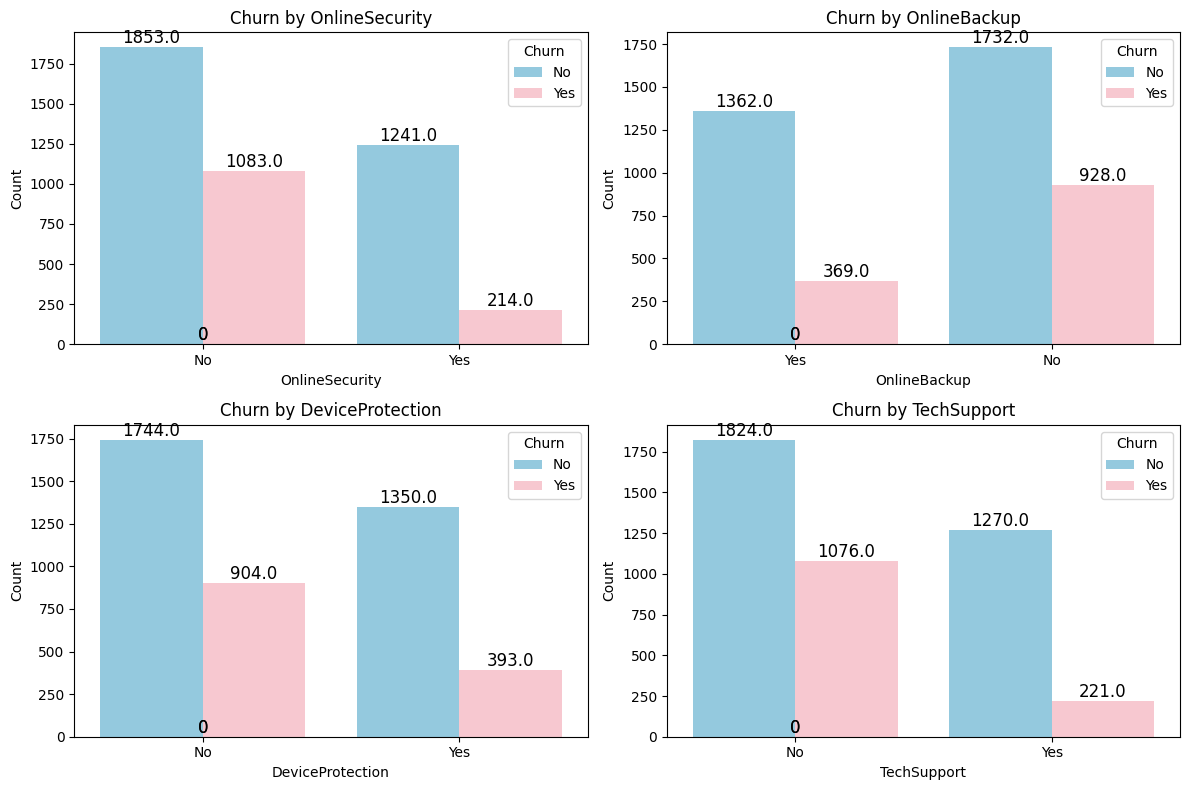

In [444]:
# List of value-added services
value_added_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Loop through each service and plot
plt.figure(figsize=(12, 8))

for i, service in enumerate(value_added_services, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(data=merged_training_dataset, x=service, hue='Churn', palette={'Yes': 'Pink', 'No': 'skyblue'})
    plt.title(f'Churn by {service}')
    plt.xlabel(service)
    plt.ylabel('Count')

    # Adding annotations
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


**Insights**
- **Online Security** Customers without OnlineSecurity have a higher churn rate (36.89%) compared to those with OnlineSecurity (14.70%). This indicates that having OnlineSecurity may contribute to lower churn rates.
- **Online Backup** Similar to OnlineSecurity, customers without OnlineBackup have a higher churn rate (34.89%) compared to those with OnlineBackup (21.30%). Providing OnlineBackup as a service could potentially reduce churn.
- **Device Prorection** Customers without DeviceProtection also show a higher churn rate (34.14%) compared to those with DeviceProtection (22.53%). This suggests that offering DeviceProtection could contribute to customer retention.
- **Tech Support** Customers without TechSupport have a significantly higher churn rate (37.09%) compared to those with TechSupport (14.82%). Providing TechSupport services appears to be crucial for reducing churn.
- Service Impact on Churn: Each value-added service (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) shows a consistent pattern where customers who do not subscribe to these services have higher churn rates compared to those who do.
- Offering and promoting these value-added services could potentially improve customer retention. Customers value these services for their security and support needs, as indicated by lower churn rates among subscribers.

#### 5. **What is the effect of different payment methods (electronic check, mailed check, bank transfer, credit card) on churn?**

In [445]:
churn_by_payment_method = merged_training_dataset.groupby('PaymentMethod')['Churn'].agg(
    churned = lambda x : (x == 'Yes').sum(),
    not_churned = lambda x : (x == 'No').sum(),
    churned_ratio = lambda x :((x == 'Yes').sum() / x.size) * 100
)
churn_by_payment_method

,churned,not_churned,churned_ratio
PaymentMethod,,,
Bank transfer (automatic),198,927,17.600000
Credit card (automatic),168,922,15.412844
Electronic check,758,941,44.588235
Mailed check,212,916,18.794326


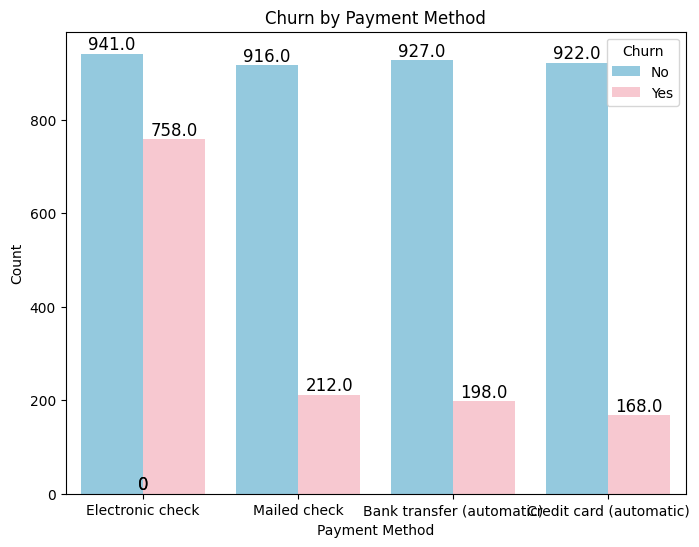

In [446]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = merged_training_dataset,x = 'PaymentMethod', hue = 'Churn', palette = {'Yes' : 'Pink', 'No' : 'skyblue'})
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2, height), ha = 'center', va = 'bottom', fontsize = 12)

plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()
        

#### **Insights**
- **Electronic Check** Customers using electronic checks have the highest churn rate among all payment methods, indicating a potential issue or dissatisfaction related to this payment method.
- **Credit card payments**, especially when automated, show the lowest churn rate among the payment methods analyzed. This suggests that convenience and reliability of automated credit card transactions may positively influence customer retention.
- Automatic bank transfers have a lower churn rate compared to electronic checks, indicating that automated processes might contribute to better customer retention.
- The business needs  to isentify and address issues or concerns related to electronic check payments to reduce churn among customers using this method.
- It should also encourage customers to opt for automated payment methods like credit card or bank transfers, which have shown lower churn rates.


#### **Testing the hypothesis**

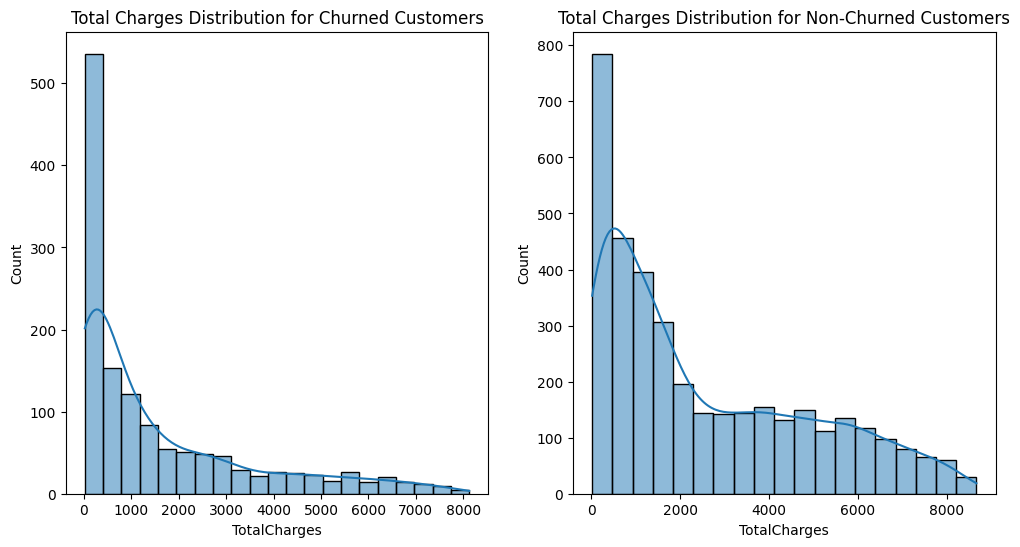

U-statistic: 1735270.0
P-value: 1.2694024750196973e-58


In [447]:
# Drop rows with null values in TotalCharges and Churn
cleaned_data = merged_training_dataset.dropna(subset=['TotalCharges', 'Churn'])

# Separate the data into churned and not churned groups
churn_yes = cleaned_data[cleaned_data['Churn'] == 'Yes']['TotalCharges']
churn_no = cleaned_data[cleaned_data['Churn'] == 'No']['TotalCharges']

# Check normality assumption
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(churn_yes, kde=True)
plt.title('Total Charges Distribution for Churned Customers')

plt.subplot(1, 2, 2)
sns.histplot(churn_no, kde=True)
plt.title('Total Charges Distribution for Non-Churned Customers')
plt.show()

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(churn_yes, churn_no, alternative='two-sided')

# Print the results
print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")




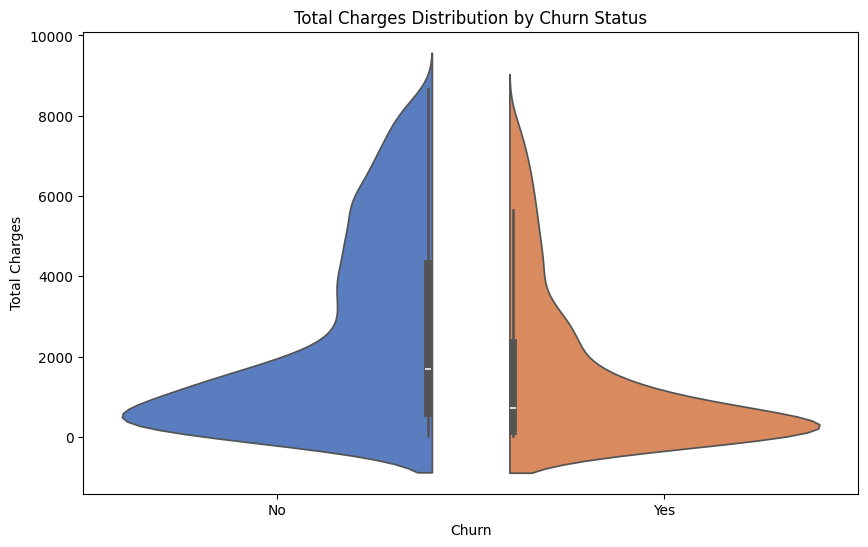

In [448]:
# Plotting violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='TotalCharges', data=cleaned_data, hue='Churn', palette='muted', split=True, legend=False)
plt.title('Total Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

In [449]:
merged_training_dataset = merged_training_dataset.drop('BundledServices', axis = 1)
merged_training_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.65,Yes


#### **Conclusion**
Based on the Mann-Whitney U test, we reject the null hypothesis. This means there is a significant difference in the total charges between customers who churn and those who do not churn. This significant difference could be indicative of underlying factors influencing customer churn related to their total charges.

#### **Data Preparation**

In [450]:
merged_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [451]:
# # #dropping the one null value in the churn colum
merged_training_dataset.dropna(subset=['Churn'], inplace=True)


In [452]:
merged_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5042 non-null   object 
 1   gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   object 
 3   Partner           5042 non-null   object 
 4   Dependents        5042 non-null   object 
 5   tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   object 
 7   MultipleLines     4773 non-null   object 
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    4391 non-null   object 
 10  OnlineBackup      4391 non-null   object 
 11  DeviceProtection  4391 non-null   object 
 12  TechSupport       4391 non-null   object 
 13  StreamingTV       4391 non-null   object 
 14  StreamingMovies   4391 non-null   object 
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   object 
 17  

In [453]:
#splitting data into two
X = merged_training_dataset.drop('Churn', axis = 1)
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.15
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.65


In [454]:
y = merged_training_dataset['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [455]:
numerical_cols = X.select_dtypes('number').columns
numerical_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [456]:
categorical_cols = X.select_dtypes('object').columns
categorical_cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [457]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [458]:
#splitting data into 4, training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [459]:
#encoding the y_train and y_test
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.transform(y_test)

In [460]:

#create pipelines
numeric_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', RobustScaler()),
    ('power_transformation', PowerTransformer(method = 'yeo-johnson'))
    
])
categoric_pipeline = Pipeline(steps = [
    ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
#combining the two pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_cols),
    ('cat_pipeline', categoric_pipeline, categorical_cols)
])

In [461]:
X.select_dtypes('number').skew()

tenure            0.225416
MonthlyCharges   -0.238663
TotalCharges      0.944216
dtype: float64

In [462]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('power_transformation',
                                                  PowerTransformer())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

### Modelling and Evaluation

In [463]:
# Define pipelines for each model

# Decision Tree
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline_dt.fit(X_train, y_train_encoded)

# Support Vector Machine
pipeline_sv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=17, probability=True))
])
pipeline_sv.fit(X_train, y_train_encoded)

# Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline_rf.fit(X_train, y_train_encoded)

# Logistic Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))

])
pipeline_lr.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power_transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [464]:

# Define models and their corresponding classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=17, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Initialize an empty DataFrame to store the results
unbalanced_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Iterate over each model and build the pipeline
for model_name, classifier in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Compute classification metrics
    unbalanced_metrics = classification_report(y_test_encode, y_pred, output_dict=True)
    
    # Extract metrics
    accuracy = unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1_score = unbalanced_metrics['weighted avg']['f1-score']
    
    # Update the unbalanced_table with metrics for the current model
    unbalanced_table.loc[len(unbalanced_table)] = [model_name, accuracy, precision, recall, f1_score]

# Sort unbalanced_table by 'F1-score' in descending order
unbalanced_table = unbalanced_table.sort_values(by='F1-score', ascending=False).reset_index(drop=True)

# Print the sorted unbalanced_table
print(unbalanced_table)


                    Model  Accuracy  Precision    Recall  F1-score
0     Logistic Regression  0.801784   0.795549  0.801784  0.797848
1  Support Vector Machine  0.802775   0.792313  0.802775  0.793951
2           Random Forest  0.793855   0.781631  0.793855  0.783331
3           Decision Tree  0.756194   0.756194  0.756194  0.756194


In [465]:
# Define the hyperparameter grids for each model
param_grids = {
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': [1, 0.1, 0.01, 0.001],
        'classifier__kernel': ['linear', 'rbf']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    }
}

# Perform Grid Search for each model
for model_name, (classifier, _) in models.items():
    if model_name == 'Logistics Regression':
        model_name = 'Logistic Regression'  # Correct the name to match param_grids key
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    try:
        param_grid = param_grids[model_name]
    except KeyError:
        print(f"KeyError: No parameter grid found for model '{model_name}'")
        continue
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train_encoded)
    
    print(f'Model: {model_name}')
    print(f'Best Hyperparameters: {grid_search.best_params_}')
    print(f'Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}')
    print('=' * 50)


TypeError: cannot unpack non-iterable DecisionTreeClassifier object

In [ ]:
print("Keys in models:", list(models.keys()))
print("Keys in param_grids:", list(param_grids.keys()))


Keys in models: ['Decision Tree', 'Support Vector Machine', 'Random Forest', 'Logistic Regression']
Keys in param_grids: ['Decision Tree', 'SVC', 'Random Forest', 'Logistic Regression']


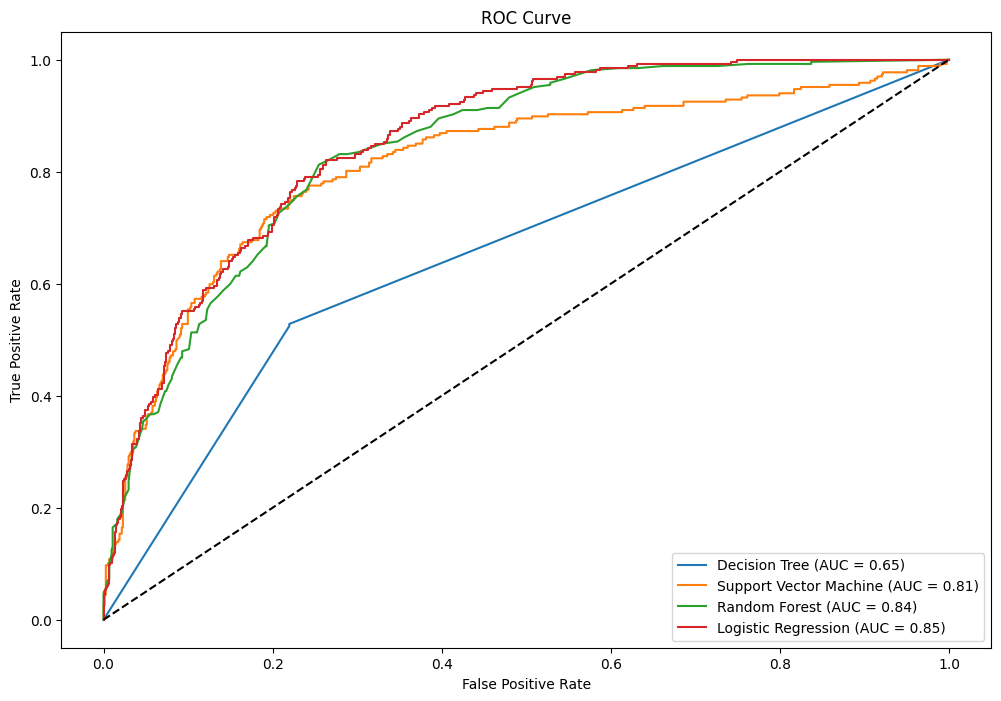

In [ ]:
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(12, 8))
    
    for model_name, (classifier, _) in models.items():  # Use items() to iterate over both key and value
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', classifier)
        ])
        pipeline.fit(X_train, y_train_encoded)
        y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_prob)  # Use y_test here
        auc = roc_auc_score(y_test, y_prob)  # Use y_test here
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
        
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Assuming X_train, y_train_encoded, X_test, y_test_encode are defined and ready to use
plot_roc_curve(models, X_test, y_test_encode)


In [ ]:
def plot_confusion_matrix(models, X_test, y_test):
    for model_name, classifier in models:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', classifier)
        ])
        pipeline.fit(X_train, y_train_encoded)
        y_pred = pipeline.predict(X_test)
        cm = confusion_matrix(y_test_encode, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Churn', 'Not_Churn'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

plot_confusion_matrix(models, X_test, y_test_encode)

ValueError: too many values to unpack (expected 2)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

def plot_confusion_matrix(models, X_test, y_test_encode, X_train, y_train_encoded, preprocessor):
    for model_name, classifier in models.items():
        try:
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', classifier)
            ])
            
            # Fit the pipeline on the training data
            pipeline.fit(X_train, y_train_encoded)
            
            # Predict on the test data
            y_pred = pipeline.predict(X_test)
            
            # Compute the confusion matrix
            cm = confusion_matrix(y_test_encode, y_pred)
            
            # Display the confusion matrix
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Churn', 'Not_Churn'])
            disp.plot(cmap=plt.cm.Blues)
            plt.title(f'Confusion Matrix for {model_name}')
            plt.show()
        
        except Exception as e:
            print(f"Error occurred for {model_name}: {str(e)}")

# Example usage
plot_confusion_matrix(models, X_test, y_test_encode, X_train, y_train_encoded, preprocessor)


Error occurred for Decision Tree: Last step of Pipeline should implement fit or be the string 'passthrough'. '(DecisionTreeClassifier(), {'classifier__max_depth': [None, 10, 20, 30], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4]})' (type <class 'tuple'>) doesn't
Error occurred for Support Vector Machine: Last step of Pipeline should implement fit or be the string 'passthrough'. '(SVC(probability=True), {'classifier__C': [0.1, 1, 10, 100], 'classifier__gamma': ['scale', 'auto'], 'classifier__kernel': ['linear', 'rbf']})' (type <class 'tuple'>) doesn't
Error occurred for Random Forest: Last step of Pipeline should implement fit or be the string 'passthrough'. '(RandomForestClassifier(), {'classifier__n_estimators': [100, 200, 300], 'classifier__max_features': ['auto', 'sqrt', 'log2'], 'classifier__max_depth': [None, 10, 20, 30], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4]})' (type <class 'tuple'>) doesn't

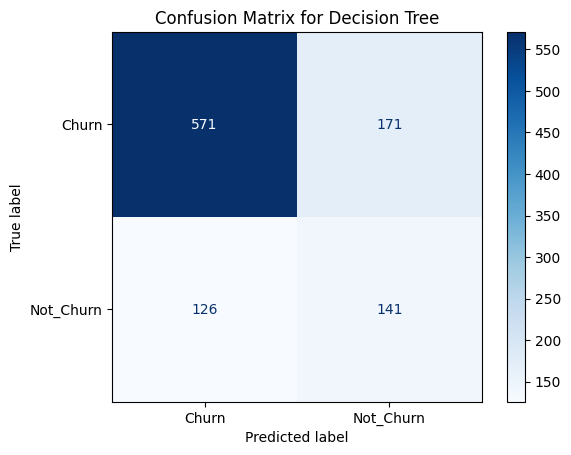

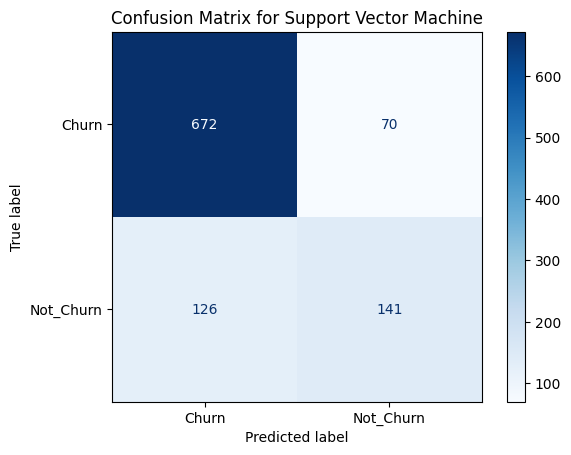

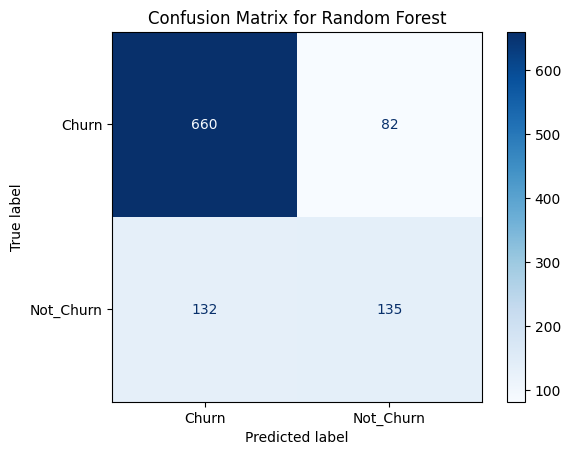

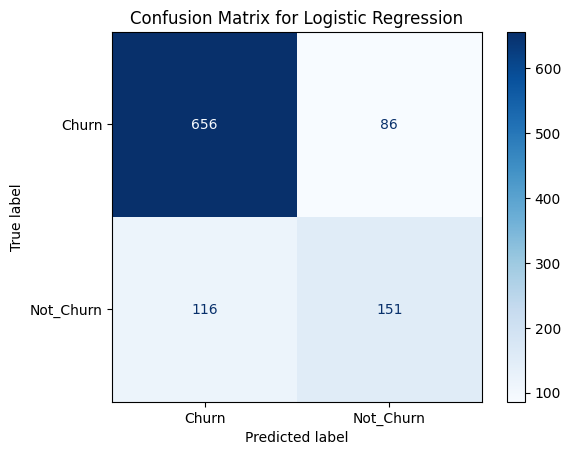

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def plot_confusion_matrix(models, X_test, y_test_encode, X_train, y_train_encoded, preprocessor):
    for model_name, (classifier, param_grid) in models.items():
        try:
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', classifier)
            ])
            
            # Fit the pipeline on the training data
            pipeline.fit(X_train, y_train_encoded)
            
            # Predict on the test data
            y_pred = pipeline.predict(X_test)
            
            # Compute the confusion matrix
            cm = confusion_matrix(y_test_encode, y_pred)
            
            # Display the confusion matrix
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Churn', 'Not_Churn'])
            disp.plot(cmap=plt.cm.Blues)
            plt.title(f'Confusion Matrix for {model_name}')
            plt.show()
        
        except Exception as e:
            print(f"Error occurred for {model_name}: {str(e)}")

# Example usage
plot_confusion_matrix(models, X_test, y_test_encode, X_train, y_train_encoded, preprocessor)


In [ ]:
# Define the logistic regression model
logistic_reg_model = LogisticRegression()

# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Create the pipeline with preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logistic_reg_model)
])

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('power_transformation',
                                                                                          PowerTransformer())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(stra...
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power_transformation',
                                                                   PowerTransformer())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [ ]:
best_parameters = grid_search.best_params_

best_parameters

{'classifier__C': 1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [ ]:
# Print the keys of the unbalanced_metrics dictionary
print(unbalanced_metrics.keys())


dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])


In [ ]:
best_models = {
    
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
    
}
#Components to export
export_dict = {
    'preprocessing': {
        'preprocessor': preprocessor,
    },
    'best models':best_models
}

with open('Exports/churn_model_components.pkl', 'wb') as f:
    pickle.dump(export_dict, f)

FileNotFoundError: [Errno 2] No such file or directory: 'Exports/churn_model_components.pkl'

In [ ]:
import os
import pickle

# Define the export dictionary
export_dict = {
    'preprocessing': {
        'preprocessor': preprocessor,
    },
    'best_models': best_models
}

# Create the directory if it doesn't exist
os.makedirs('Exports', exist_ok=True)

# Save the dictionary to a file
with open('Exports/churn_model_components.pkl', 'wb') as f:
    pickle.dump(export_dict, f)

print("Model components exported successfully.")


Model components exported successfully.


In [ ]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Loading the exported model components
with open('Exports/churn_model_components.pkl', 'rb') as f:
    exported_dict = pickle.load(f)

# Extract the components from the loaded dictionary
preprocessor = exported_dict['preprocessing']['preprocessor']
models = exported_dict['best_models']

In [466]:
test_data = pd.read_excel(r"C:\Users\hp\Downloads\Telco-churn-last-2000.xlsx")

# Transform the test data
test_data_processed = preprocessor.transform(test_data)
test_data.info()



ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: ' '

In [467]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [ ]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('power_transformation',
                                                  PowerTransformer())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

##### **Key Insights**
- some of the columns had True, False, Yes and No so I  changed all of them to just Yes and No for purposes of uniformity
- the senior citizens columns had 0 and 1 for No and Yes respectively so they were changed to Yes and No for uniformity with the other columns
- plotted bar plots for categorical variables and histograms for numerical values
- The mean and median for the tenure are relatively close (32.58 vs 29.00), indicating a roughly symmetric distribution.
- The mean (65.09) is slightly lower than the median (70.55), suggesting a possible negative skewness.
This indicates that the distribution of monthly charges might be slightly skewed to the left, with more values concentrated towards higher charges.
- The mean (2302.06) is considerably higher than the median (1401.15), indicating positive skewness.
This suggests that there are some customers with very high total charges, pulling the mean upwards compared to the median.The distribution of total charges is likely skewed to the right, with a longer tail on the higher side.


